In [1]:
%matplotlib widget 
import sys
sys.path.insert(0,'../')
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/dipole_facet_config.yaml')

start reinterpolation. number of slice 1
t_x 1.0
t_z 1.0
xbins 500
zbins 500


In [3]:
testCSR.run()

Calculating CSR at s= 0.05
--- 7.8696417808532715 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_obed-2024-06-06T15_19_12-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_obed-2024-06-06T15_19_12-07_00-wakes.h5
Finish step 2 in 8.937082290649414 seconds
Calculating CSR at s= 0.1
Finish step 3 in 0.3322744369506836 seconds
Calculating CSR at s= 0.15000000000000002
--- 7.534534215927124 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_obed-2024-06-06T15_19_12-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_obed-2024-06-06T15_19_12-07_00-wakes.h5
Finish step 4 in 8.21873664855957 seconds
Calculating CSR at s= 0.2
Finish step 5 in 0.34523749351501465 seconds
Calculating CSR at s= 0.25
--- 7.863007307052612 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_ob

## Parallel Run with MPI

In [4]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [2]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'facet_obed-2024-05-27T21_55_35-07_00',
                             work_dir = './output')

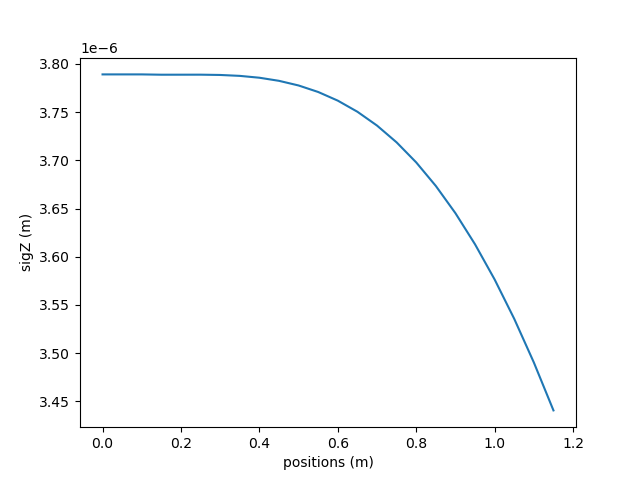

In [3]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 0.65 m, step count 13
ebeam energy 9856000000.0


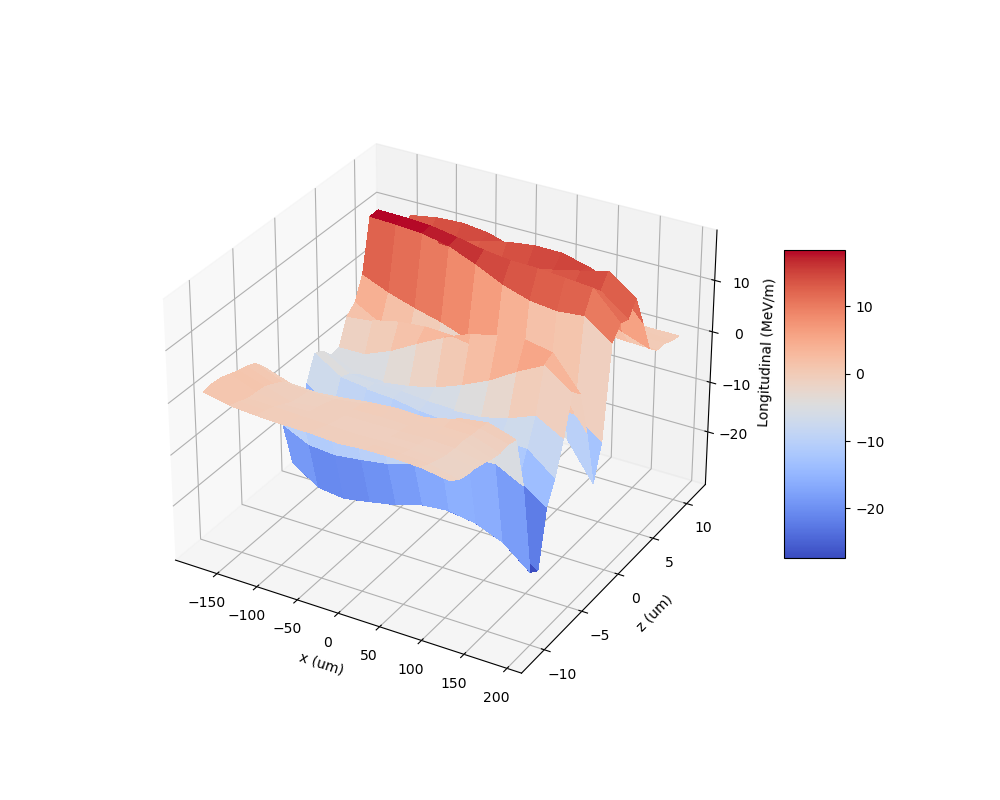

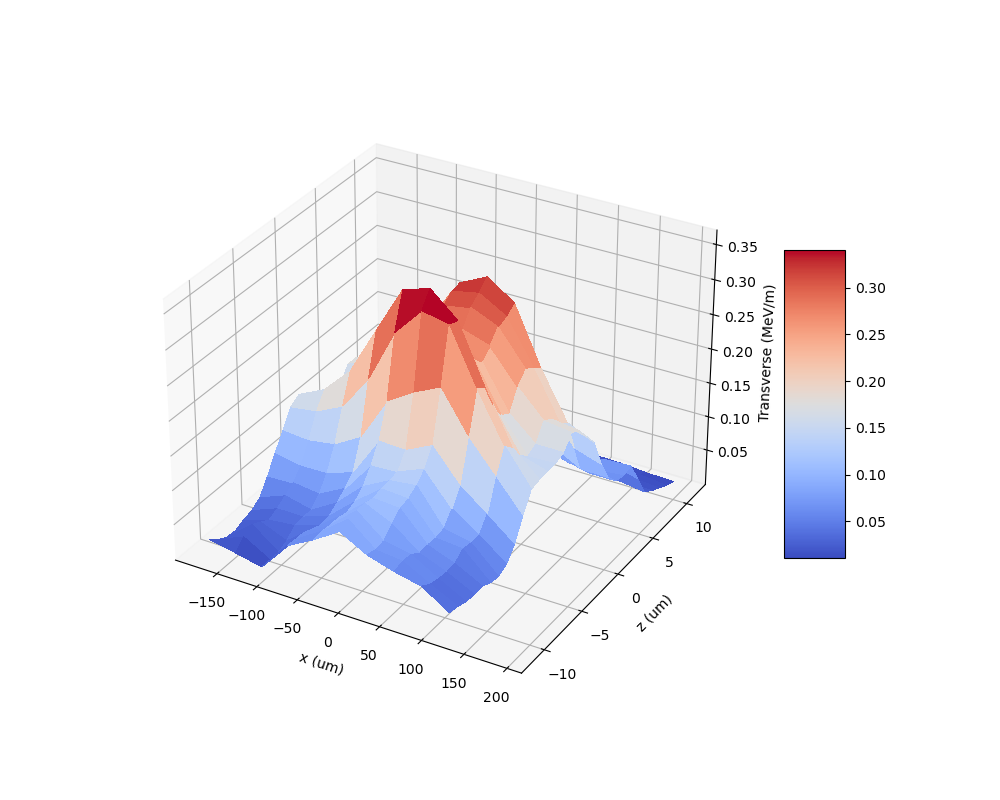

In [4]:
DFplot.plot_wakes(s = 0.7)

plot longitudinal wakes at nearest point s  = 0.5499999999999999 m, step count 11


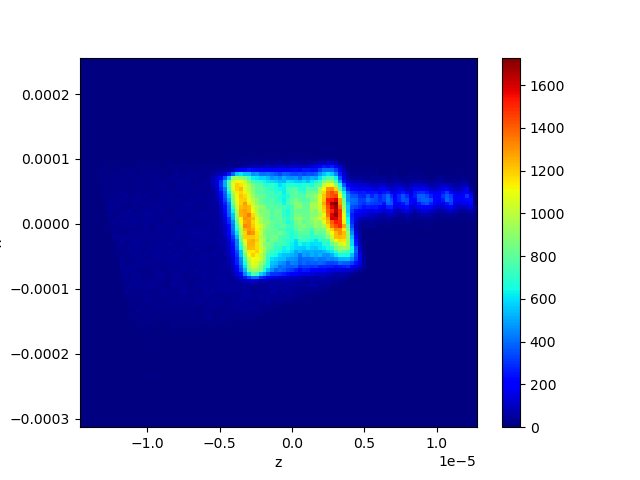

In [5]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')

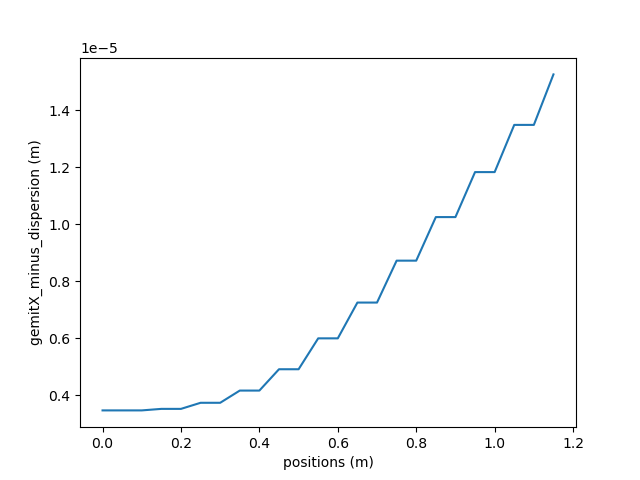

In [6]:
DFplot.plot_stats(key = 'gemitX_minus_dispersion')